In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('model_evaluation/style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
import pickle

#### testing the model

In [3]:
filename = 'model_evaluation/my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


In [4]:
x_col = 'YEAR'
testing_data = pd.read_csv('model_evaluation/test_dataset.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['NSW_total'])

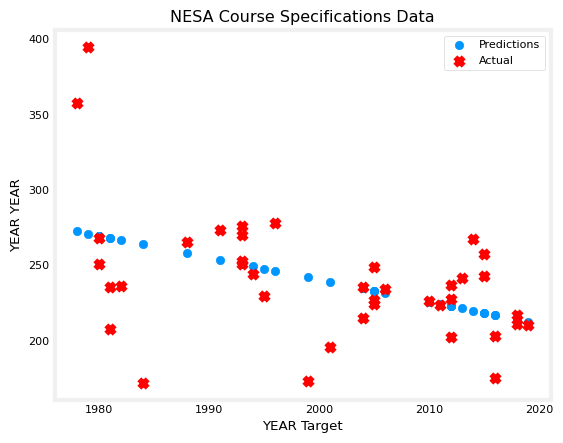

In [5]:
# Define the degree for polynomial features
degree = 2  # You can try different degrees
# Ridge regression with cross-validation for model_A
alphas = np.logspace(-6, 6, 13)
model_A_pipeline = make_pipeline(PolynomialFeatures(degree, include_bias=False), RidgeCV(alphas=alphas))
model_A_pipeline.fit(x_test, y_test)
y_pred = model_A_pipeline.predict(x_test)
plt.scatter(x_test, y_pred, label='Predictions')
plt.scatter(x_test, y_test, marker='x', c='r', label='Actual')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'YEAR {x_col}')
plt.xlabel(f'YEAR Target')
plt.legend()
plt.show()

In [6]:
test_score = model_A_pipeline.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.206870839539528


In [7]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),
    testing_data.columns[1]: y_test,
    'Predicted result': y_pred,
    'Loss': y_test - y_pred.round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

    Unnamed: 0  state_total  Predicted result    Loss
0         1988        265.6        257.903770    7.70
1         2011        223.8        224.249338   -0.45
2         1995        229.5        247.702097  -18.20
3         2012        237.1        222.777320   14.32
4         2005        226.9        233.066076   -6.17
5         2014        267.5        219.831089   47.67
6         1980        250.9        269.518917  -18.62
7         1981        235.7        268.069585  -32.37
8         1980        268.2        269.518917   -1.32
9         1979        394.9        270.967517  123.93
10        1996        278.1        246.241788   31.86
11        2004        214.9        234.532972  -19.63
12        1993        275.8        250.620520   25.18
13        1993        250.5        250.620520   -0.12
14        2015        242.5        218.356876   24.14
15        1984        171.9        263.717198  -91.82
16        2013        241.3        221.304570   20.00
17        1994        243.8 

You may want to do some manual predictions to understand your model.

In [8]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[4936.41548985]
[4934.64276754]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [9]:
print(f'X Axis intercept: {model_A_pipeline.named_steps["ridgecv"].intercept_}')
print(f'Coefficient: {model_A_pipeline.named_steps["ridgecv"].coef_}')

X Axis intercept: 1704.0047018766422
Coefficient: [-9.37402536e-06 -3.65898180e-04]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [10]:
filename = 'model_evaluation/my_saved_model_v3.sav'
model_C = pickle.load(open(filename, 'rb'))

In [13]:
mx_col = ['NSW_total','VIC_total','QLD_total','SA_total','WA_total','TAS_total','ACT_total']
testing_data = pd.read_csv('model_evaluation/test_dataset.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['YEAR'])

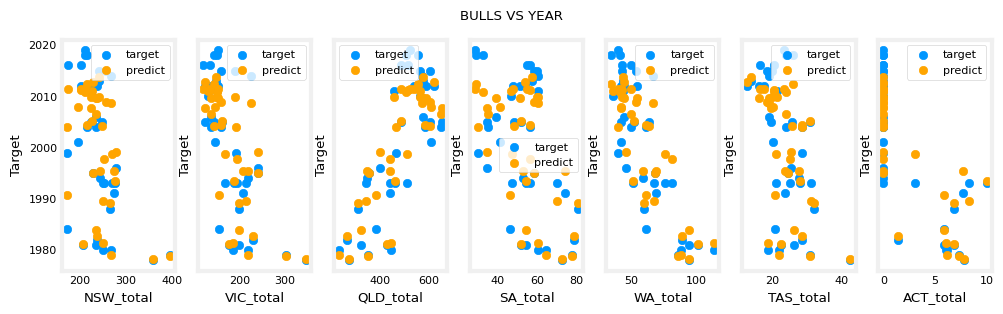

In [14]:
# Polynomial features and Ridge regression with cross-validation for model_C
model_C_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree, include_bias=False), RidgeCV(alphas=alphas))
model_C_pipeline.fit(mx_test, my_test)
my_pred = model_C_pipeline.predict(mx_test)

# Plot predictions and targets vs original features
fig, ax = plt.subplots(1, len(mx_col), figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:, i], my_test, label='target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:, i], my_pred, color="orange", label='predict')
    ax[i].set_ylabel("Target")
    ax[i].legend()
fig.suptitle("BULLS VS YEAR")
plt.show()

In [15]:
test_score = model_C_pipeline.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.9186984382610218
